# ZOMATO DATA ANALYSIS PROJECT

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DATA LOADING

In [38]:
df=pd.read_csv(r"C:\Users\uday\Downloads\Zomato data .csv")

In [39]:
print(df)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [22]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


# DATA CLEANING

In [53]:
# to count nulls in each column
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [54]:
# to check if any null values exists
df.isnull().any()

name                           False
online_order                   False
book_table                     False
rate                           False
votes                          False
approx_cost(for two people)    False
listed_in(type)                False
dtype: bool

In [55]:
# to check total nulls in dataset
df.isnull().sum().sum()

0

In [49]:
#verifying null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [24]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [25]:
df.nunique()

name                           145
online_order                     2
book_table                       2
rate                            20
votes                           90
approx_cost(for two people)     18
listed_in(type)                  4
dtype: int64

In [26]:
num_cols=['rate','votes','approx_cost(for two people)','listed_in(type)']
for c in num_cols:
    print(f"{c}:min={df[c].min()},max={df[c].max()}")

rate:min=2.6/5,max=4.6/5
votes:min=0,max=4884
approx_cost(for two people):min=100,max=950
listed_in(type):min=Buffet,max=other


In [27]:
df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'other', 'Dining'], dtype=object)

In [35]:
df['rate']=df['rate'].str.replace('/5',' ').astype(float)

In [36]:
df['rate']

0      4.1
1      4.1
2      3.8
3      3.7
4      3.8
      ... 
143    3.3
144    3.3
145    4.0
146    3.0
147    3.9
Name: rate, Length: 148, dtype: float64

In [37]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [42]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

df['rate']=df['rate'].apply(handleRate)
print(df)

                      name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.1    775   
1           Spice Elephant          Yes         No   4.1    787   
2          San Churro Cafe          Yes         No   3.8    918   
3    Addhuri Udupi Bhojana           No         No   3.7     88   
4            Grand Village           No         No   3.8    166   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.3      0   
144        New Indraprasta           No         No   3.3      0   
145           Anna Kuteera          Yes         No   4.0    771   
146                 Darbar           No         No   3.0     98   
147          Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            800          

# what type of restaurants do the majority of customers order from ? 

In [56]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'type of restaraunt')

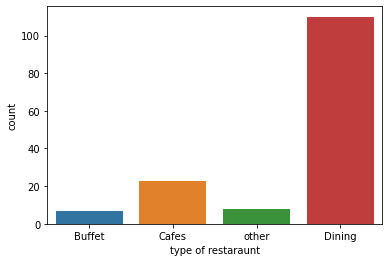

In [57]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('type of restaraunt')

In [10]:
df['listed_in(type)'].value_counts()

Dining    110
Cafes      23
other       8
Buffet      7
Name: listed_in(type), dtype: int64

Insight-Majority of restaraunts falls under dining category

# How many votes has each type of restaurant received from customers ?

In [58]:
df.groupby('listed_in(type)')['votes'].sum().sort_values(ascending=False)

listed_in(type)
Dining    20363
other      9367
Cafes      6434
Buffet     3028
Name: votes, dtype: int64

Text(0, 0.5, 'votes')

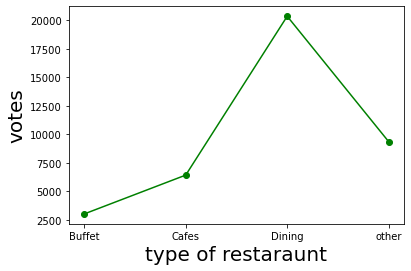

In [62]:
grouped_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c='green',marker='o')
plt.xlabel('type of restaraunt',c='black',size=20)
plt.ylabel('votes',c='black',size=20)

Insight-Dining restaraunts has highest number of votes.

# What are the ratings that the majority of the restaurants have received?

In [63]:
df['rate'].dtype

dtype('float64')

In [65]:
df.groupby('listed_in(type)')['rate'].mean().round(2).sort_values(ascending=False)

listed_in(type)
other     3.91
Buffet    3.84
Cafes     3.77
Dining    3.57
Name: rate, dtype: float64

In [66]:
df['rate'].dtype

dtype('float64')

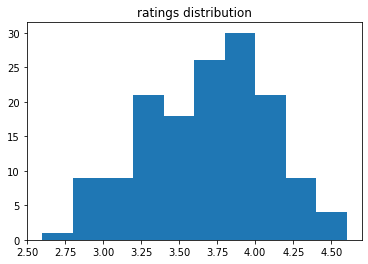

In [69]:
plt.hist(df['rate'],bins=10)
plt.title('ratings distribution')
plt.show()

Insight: Majority of the restaurants have received ratings between 3.25 and 4.2

# zomato has observed that most couples order most of their food online,what is the average spending on each order.

In [70]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='count'>

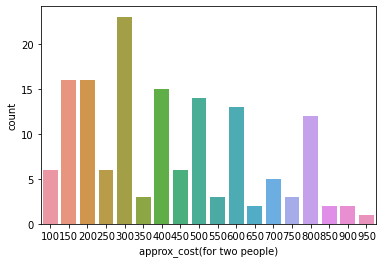

In [78]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

Insight:Majority of the couples prefer ordering online from restaraunts with and approximate cost around 300.

# which mode has received the maximum rating

In [84]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [86]:
df.groupby('online_order')['rate'].max()

online_order
No     4.3
Yes    4.6
Name: rate, dtype: float64

<AxesSubplot:xlabel='online_order', ylabel='rate'>

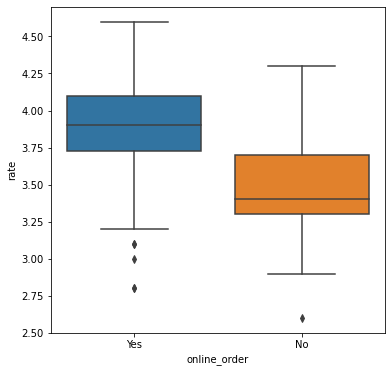

In [87]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)

Insight: online orders has received maximum ratings than offline orders

# which type of restaraunt received more offline orders, so that zomato can provide those customers some good offers

In [94]:
df[df['online_order']=='No']['listed_in(type)'].value_counts()


Dining    77
Cafes      8
Buffet     3
other      2
Name: listed_in(type), dtype: int64

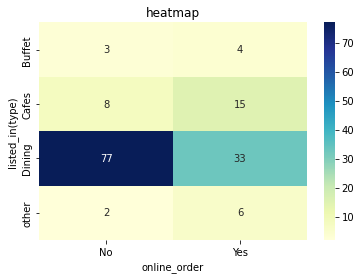

In [99]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size' ,fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.title('heatmap')
plt.xlabel('online_order')
plt.ylabel('listed_in(type)')
plt.show()

Insight: dining restaraunts primarily receive offline orders, whereas cafes primarily receive online orders.This suggests customers prefer online orders from cafes and orders in-person at dinining(restaraunts)